In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date


In [40]:
symbol = "VCI"
fromDate = "01/01/2023"
endDate = "10/03/2024"
securities_olhc = pd.read_excel("VCI.xlsx")
price = pd.DataFrame(securities_olhc)
price.Close = price.Close.astype(int)
price = price.drop(["Symbol", "Market", "Time", "Value"], axis=1)
price["TradingDate"] = pd.to_datetime(price["TradingDate"], format="%d/%m/%Y")
price.set_index("TradingDate", inplace=True)

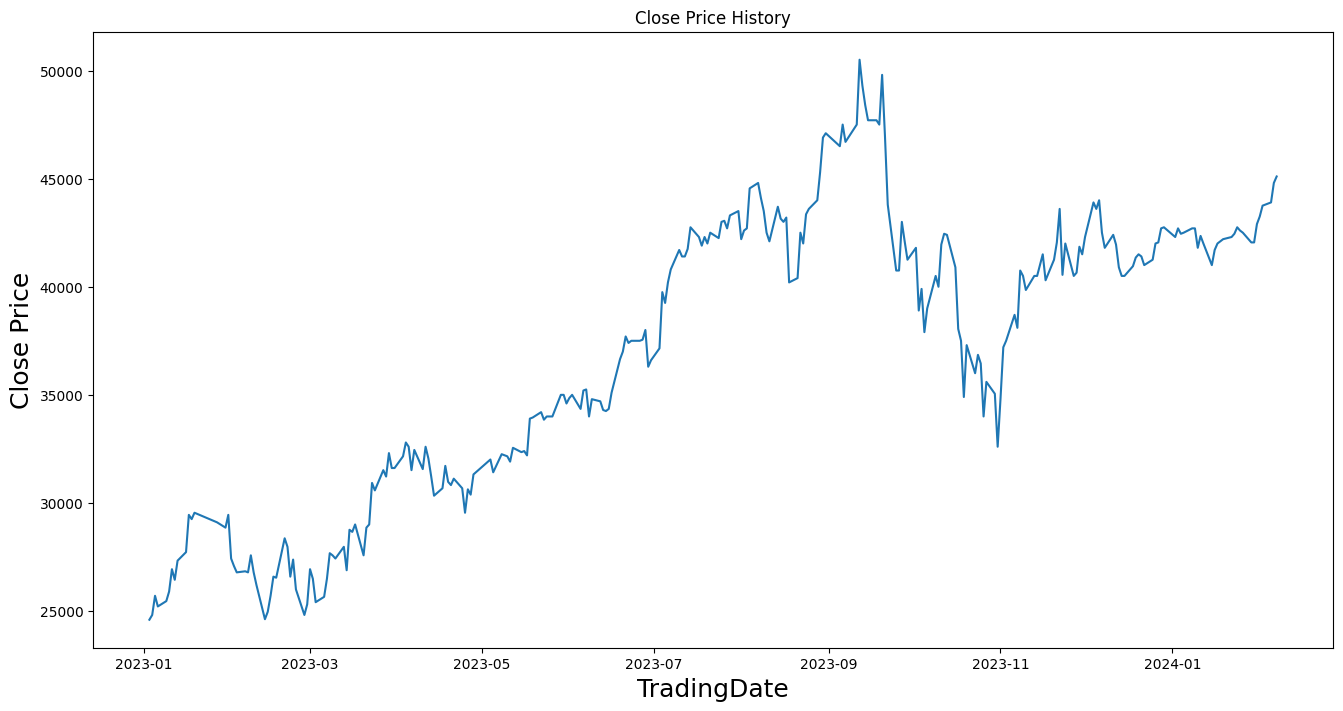

In [41]:
# plot
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(price.Close)
plt.xlabel("TradingDate", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.show()

In [42]:
#Create new df with Close
data = price.filter(["Close"])
dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)
training_data_len

221

In [43]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [8.49388055e-03],
       [4.27396626e-02],
       [2.37056484e-02],
       [3.32419598e-02],
       [5.03455465e-02],
       [9.02667851e-02],
       [7.12713795e-02],
       [1.05478553e-01],
       [1.20690321e-01],
       [1.87251457e-01],
       [1.79645574e-01],
       [1.91035095e-01],
       [1.73931508e-01],
       [1.64433806e-01],
       [1.87251457e-01],
       [1.09262191e-01],
       [9.59808502e-02],
       [8.45527200e-02],
       [8.64831474e-02],
       [8.45527200e-02],
       [1.14976256e-01],
       [8.45527200e-02],
       [6.17350681e-02],
       [9.26605150e-04],
       [1.42079456e-02],
       [4.27396626e-02],
       [7.69468360e-02],
       [7.50550172e-02],
       [1.45399792e-01],
       [1.30188024e-01],
       [7.69468360e-02],
       [1.07370372e-01],
       [5.41291842e-02],
       [8.49388055e-03],
       [2.75278947e-02],
       [9.02667851e-02],
       [7.31631983e-02],
       [3.13115324e-02],
       [4.08478437e-02],


In [44]:
# Create the training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00849388, 0.04273966, 0.02370565, 0.03324196,
       0.05034555, 0.09026679, 0.07127138, 0.10547855, 0.12069032,
       0.18725146, 0.17964557, 0.1910351 , 0.17393151, 0.16443381,
       0.18725146, 0.10926219, 0.09598085, 0.08455272, 0.08648315,
       0.08455272, 0.11497626, 0.08455272, 0.06173507, 0.00092661,
       0.01420795, 0.04273966, 0.07694684, 0.07505502, 0.14539979,
       0.13018802, 0.07694684, 0.10737037, 0.05412918, 0.00849388,
       0.02752789, 0.09026679, 0.0731632 , 0.03131153, 0.04084784,
       0.0731632 , 0.1187985 , 0.11497626, 0.10926219, 0.13018802,
       0.08837497, 0.16061156, 0.15682792, 0.17010926, 0.11497626])]
[0.16443380564456977]

[array([0.        , 0.00849388, 0.04273966, 0.02370565, 0.03324196,
       0.05034555, 0.09026679, 0.07127138, 0.10547855, 0.12069032,
       0.18725146, 0.17964557, 0.1910351 , 0.17393151, 0.16443381,
       0.18725146, 0.10926219, 0.09598085, 0.08455272, 0.08648315,
       0.08455272, 0.11497626, 0.08

In [45]:
# Convert the x_train and y_train
x_train,y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [46]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [47]:
#Compile the model
model.compile(optimizer="adam", loss = "mean_squared_error")

In [48]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

171/171 [==============================] - 5s 15ms/step - loss: 0.0159


In [49]:
# Create the testing dataset
# Create a new array containing scaled value from index 
test_data = scaled_data[training_data_len - 50:, :]

#Create the data set x-test and y-test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [50]:
# Covert the data to numpy array
x_test = np.array(x_test)

In [51]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [52]:
# Get the models predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 9ms/step


In [53]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

799.5514204545455

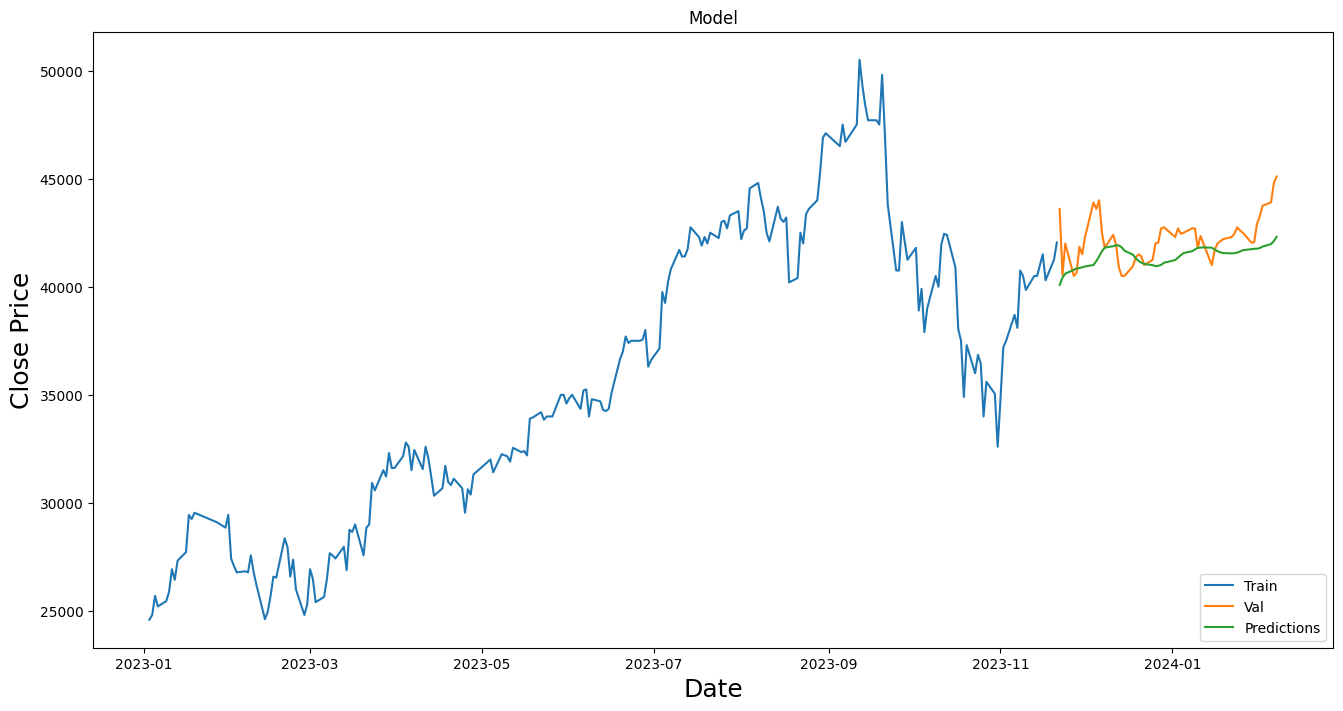

In [54]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.copy()
valid["Predictions"] = predictions
#Visualize model
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [55]:
# Show the valid and predicted prices
valid 

,Close,Predictions
TradingDate,,
2023-11-22,43600,40085.269531
2023-11-23,40550,40416.152344
2023-11-24,42000,40606.167969
2023-11-27,40500,40780.132812
2023-11-28,40650,40849.546875
2023-11-29,41850,40860.792969
2023-11-30,41500,40900.312500
2023-12-01,42300,40934.671875
2023-12-04,43900,41007.980469
